# Regressão linear

## Passo 1

Executando o código usando os dados de escolaridade x salário.

In [1]:
#coding: utf-8
from numpy import *
from matplotlib import pyplot
import time

In [2]:
def compute_RSS(b, m, points):
    totalError = 0
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError += (y - (m*x + b))**2

    return totalError

In [3]:
def step_gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    n = float(len(points))
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/n) * (y - ((current_m * x) + current_b))
        m_gradient += -(2/n) * x*(y - ((current_m * x) + current_b))

    new_b = current_b - (learning_rate*b_gradient)
    new_m = current_m - (learning_rate * m_gradient)
    return [new_b,new_m]

In [4]:
def gradient_descent_runner1(points, initial_b, initial_m, learning_rate, num_iterations):
    current_b = initial_b
    current_m = initial_m
    
    for i in range(num_iterations):
        current_b, current_m = step_gradient(current_b, current_m, array(points), learning_rate)
        
    return [current_b,current_m]

In [7]:
def run():
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    
    [m0, m1] = gradient_descent_runner1(points,initial_b,initial_m,learning_rate, num_iterations)
    print "Após {0} iterações m0 = {1}, m1 = {2}, RSS = {3}".format(num_iterations, m0, m1, compute_RSS(m0, m1, points))

In [8]:
points = genfromtxt('income.csv', delimiter=',')
run()

Após 1000 iterações m0 = -0.182342553765, m1 = 3.2621822676, RSS = 3101.95268752


## Passo 2

O código foi alterado para imprimir a iteração e os valores de w0, w1 e RSS.

In [9]:
def gradient_descent_runner1(points, initial_b, initial_m, learning_rate, num_iterations):
    current_b = initial_b
    current_m = initial_m
    
    for i in range(num_iterations):
        current_b, current_m = step_gradient(current_b, current_m, array(points), learning_rate)
        print "Iteração: {0}, w0 = {1}, w1 = {2}, RSS = {3}".format((i + 1), current_b, current_m, compute_RSS(current_b, current_m, points))
        
    return [current_b,current_m]

run()

Iteração: 1, w0 = 0.0100290938614, w1 = 0.174832456656, RSS = 79447.1437988
Iteração: 2, w0 = 0.0194967180427, w1 = 0.340232819504, RSS = 71435.2077787
Iteração: 3, w0 = 0.028433167538, w1 = 0.496710008983, RSS = 64264.5304096
Iteração: 4, w0 = 0.0368671027371, w1 = 0.644745486091, RSS = 57846.7784979
Iteração: 5, w0 = 0.0448256376224, w1 = 0.784794733993, RSS = 52102.893944
Iteração: 6, w0 = 0.0523344232075, w1 = 0.91728865969, RSS = 46962.119846
Iteração: 7, w0 = 0.0594177264732, w1 = 1.04263492005, RSS = 42361.1288638
Iteração: 8, w0 = 0.0660985050451, w1 = 1.16121917632, RSS = 38243.2431061
Iteração: 9, w0 = 0.0723984778412, w1 = 1.27340628089, RSS = 34557.7359297
Iteração: 10, w0 = 0.0783381919082, w1 = 1.37954140009, RSS = 31259.2070516
Iteração: 11, w0 = 0.0839370856509, w1 = 1.47995107638, RSS = 28307.0232743
Iteração: 12, w0 = 0.0892135486507, w1 = 1.57494423318, RSS = 25664.8179359
Iteração: 13, w0 = 0.0941849782562, w1 = 1.6648131256, RSS = 23300.0429191
Iteração: 14, w0 = 0

Iteração: 861, w0 = -0.130402479969, w1 = 3.2590903811, RSS = 3107.79582108
Iteração: 862, w0 = -0.130776394831, w1 = 3.25911263948, RSS = 3107.75372895
Iteração: 863, w0 = -0.131150306137, w1 = 3.25913489766, RSS = 3107.71163762
Iteração: 864, w0 = -0.131524213887, w1 = 3.25915715563, RSS = 3107.66954709
Iteração: 865, w0 = -0.131898118081, w1 = 3.25917941338, RSS = 3107.62745737
Iteração: 866, w0 = -0.132272018719, w1 = 3.25920167092, RSS = 3107.58536844
Iteração: 867, w0 = -0.132645915801, w1 = 3.25922392825, RSS = 3107.54328032
Iteração: 868, w0 = -0.133019809327, w1 = 3.25924618537, RSS = 3107.50119299
Iteração: 869, w0 = -0.133393699297, w1 = 3.25926844227, RSS = 3107.45910647
Iteração: 870, w0 = -0.133767585711, w1 = 3.25929069897, RSS = 3107.41702075
Iteração: 871, w0 = -0.134141468569, w1 = 3.25931295545, RSS = 3107.37493582
Iteração: 872, w0 = -0.134515347871, w1 = 3.25933521172, RSS = 3107.3328517
Iteração: 873, w0 = -0.134889223618, w1 = 3.25935746778, RSS = 3107.29076838
I

## Passos 3

Alterando o código para plotar RSS X Iteração.

In [10]:
def gradient_descent_runner2(points, initial_b, initial_m, learning_rate, num_iterations):
    current_b = initial_b
    current_m = initial_m
    X_plot = []
    Y_plot = []
    
    for i in range(num_iterations):
        current_b, current_m = step_gradient(current_b, current_m, array(points), learning_rate)
        X_plot.append(i+1)
        Y_plot.append(compute_RSS(current_b, current_m, points))
    
    pyplot.plot(X_plot,Y_plot)
    pyplot.ylabel("RSS")
    pyplot.xlabel("Iteracao")
    pyplot.show()
    return [current_b,current_m]

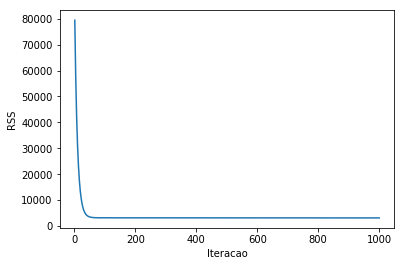

In [11]:
def run2():
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    gradient_descent_runner2(points,initial_b,initial_m,learning_rate, num_iterations)
    
run2()

O RSS diminui a cada iteração e percebe-se que, como o esperado, a variação do RSS no no início é bem mais acentuada.

## Passo 4

Alterando os valores de leaning rate e número de iterações para alcançar os valores de w0 = -39 e w1 = 5.

In [12]:
def run3():
    learning_rate = 0.0025
    initial_b = 0
    initial_m = 0
    num_iterations = 20000
    gradient_descent_runner1(points,initial_b,initial_m,learning_rate, num_iterations)

In [ ]:
run3()

Para atingir os valores w0=-39 e w1=5, usei os valores de leaning rate = 0.0025 e número de iterações = 20000.

## Passos 5 e 6

Alterando o código para funcionar com o tamanho do gradiente em vez do número de iterações e incluindo print para ver o valor de w0, w1 e RSS para o passo 6.

In [11]:
def step_gradient2(current_b, current_m, points):
    b_gradient = 0
    m_gradient = 0
    n = float(len(points))
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/n) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/n) * x*(y - ((current_m * x) + current_b))
    return [b_gradient,m_gradient]

def gradient_descent_runner3(points, initial_b, initial_m, learning_rate, gradient_tolerance):
    current_b = initial_b
    current_m = initial_m
    xPlot = []
    yPlot = []
    i=0

    while True:
        i+=1
        
        b_gradient, m_gradient = step_gradient2(current_b, current_m, array(points))
        print "Iteração: {0}, w0 = {1}, w1 = {2}, RSS = {3}".format((i + 1), current_b, current_m, compute_RSS(current_b, current_m, points))
        current_b -= learning_rate * b_gradient
        current_m -= learning_rate * m_gradient
        
        gradientSize = math.sqrt(b_gradient**2 + m_gradient**2)
        yPlot.append(gradientSize)
        xPlot.append(i)
        
        if gradientSize <= gradient_tolerance:
            break
            
    return [[current_b,current_m],[xPlot,yPlot]]

In [12]:
def run4():
    learning_rate = 0.0025
    initial_b = 0
    initial_m = 0
    gradient_tolerance = 0.03
    return gradient_descent_runner3(points,initial_b,initial_m,learning_rate, gradient_tolerance)[1]
    
PlotData = run4()

Iteração: 2, w0 = 0, w1 = 0, RSS = 88399.0349114
Iteração: 3, w0 = 0.250727346534, w1 = 4.37081141639, RSS = 13521.801845
Iteração: 4, w0 = 0.150536143024, w1 = 2.84656420317, RSS = 4405.63496255
Iteração: 5, w0 = 0.17278567259, w1 = 3.37914020726, RSS = 3294.93413599
Iteração: 6, w0 = 0.15231787418, w1 = 3.19407734745, RSS = 3158.78430531
Iteração: 7, w0 = 0.146757443548, w1 = 3.25940306538, RSS = 3141.27251172
Iteração: 8, w0 = 0.135998757634, w1 = 3.23736643846, RSS = 3138.2036415
Iteração: 9, w0 = 0.127056795303, w1 = 3.24581090879, RSS = 3136.89343537
Iteração: 10, w0 = 0.117483985157, w1 = 3.24362015101, RSS = 3135.79776667
Iteração: 11, w0 = 0.108134299684, w1 = 3.24513991222, RSS = 3134.72865995
Iteração: 12, w0 = 0.0987097817423, w1 = 3.24536487018, RSS = 3133.66323168
Iteração: 13, w0 = 0.0893143897529, w1 = 3.24604141366, RSS = 3132.5986959
Iteração: 14, w0 = 0.0799118512454, w1 = 3.24656021656, RSS = 3131.53471326
Iteração: 15, w0 = 0.0705148211981, w1 = 3.24713387668, RSS 

Iteração: 945, w0 = -7.76963542934, w1 = 3.7138383145, RSS = 2331.37963572
Iteração: 946, w0 = -7.77716697082, w1 = 3.71428665178, RSS = 2330.69661545
Iteração: 947, w0 = -7.78469672158, w1 = 3.71473488247, RSS = 2330.01391993
Iteração: 948, w0 = -7.79222468203, w1 = 3.71518300657, RSS = 2329.33154901
Iteração: 949, w0 = -7.79975085261, w1 = 3.71563102414, RSS = 2328.64950255
Iteração: 950, w0 = -7.80727523375, w1 = 3.71607893518, RSS = 2327.96778037
Iteração: 951, w0 = -7.81479782586, w1 = 3.71652673972, RSS = 2327.28638234
Iteração: 952, w0 = -7.82231862937, w1 = 3.71697443779, RSS = 2326.60530828
Iteração: 953, w0 = -7.82983764472, w1 = 3.71742202941, RSS = 2325.92455806
Iteração: 954, w0 = -7.83735487231, w1 = 3.71786951462, RSS = 2325.24413152
Iteração: 955, w0 = -7.84487031258, w1 = 3.71831689343, RSS = 2324.5640285
Iteração: 956, w0 = -7.85238396596, w1 = 3.71876416586, RSS = 2323.88424884
Iteração: 957, w0 = -7.85989583287, w1 = 3.71921133196, RSS = 2323.2047924
Iteração: 958, 

Iteração: 2105, w0 = -15.405741008, w1 = 4.16840008192, RSS = 1722.27315139
Iteração: 2106, w0 = -15.411456963, w1 = 4.16874034104, RSS = 1721.87974315
Iteração: 2107, w0 = -15.4171715589, w1 = 4.16908051927, RSS = 1721.48652197
Iteração: 2108, w0 = -15.4228847961, w1 = 4.16942061661, RSS = 1721.09348775
Iteração: 2109, w0 = -15.4285966749, w1 = 4.16976063309, RSS = 1720.70064041
Iteração: 2110, w0 = -15.4343071957, w1 = 4.17010056872, RSS = 1720.30797985
Iteração: 2111, w0 = -15.4400163587, w1 = 4.17044042353, RSS = 1719.915506
Iteração: 2112, w0 = -15.4457241642, w1 = 4.17078019754, RSS = 1719.52321875
Iteração: 2113, w0 = -15.4514306127, w1 = 4.17111989076, RSS = 1719.13111803
Iteração: 2114, w0 = -15.4571357043, w1 = 4.17145950321, RSS = 1718.73920373
Iteração: 2115, w0 = -15.4628394395, w1 = 4.17179903492, RSS = 1718.34747578
Iteração: 2116, w0 = -15.4685418186, w1 = 4.1721384859, RSS = 1717.95593409
Iteração: 2117, w0 = -15.4742428418, w1 = 4.17247785616, RSS = 1717.56457856
Iter

Iteração: 3724, w0 = -23.0876227004, w1 = 4.62568680789, RSS = 1277.97721103
Iteração: 3725, w0 = -23.091512185, w1 = 4.62591834096, RSS = 1277.79505231
Iteração: 3726, w0 = -23.0954007448, w1 = 4.62614981898, RSS = 1277.61298021
Iteração: 3727, w0 = -23.0992883801, w1 = 4.62638124197, RSS = 1277.43099467
Iteração: 3728, w0 = -23.103175091, w1 = 4.62661260993, RSS = 1277.24909566
Iteração: 3729, w0 = -23.1070608778, w1 = 4.62684392288, RSS = 1277.06728314
Iteração: 3730, w0 = -23.1109457407, w1 = 4.62707518083, RSS = 1276.88555707
Iteração: 3731, w0 = -23.11482968, w1 = 4.6273063838, RSS = 1276.7039174
Iteração: 3732, w0 = -23.1187126957, w1 = 4.6275375318, RSS = 1276.52236409
Iteração: 3733, w0 = -23.1225947883, w1 = 4.62776862484, RSS = 1276.34089711
Iteração: 3734, w0 = -23.1264759578, w1 = 4.62799966293, RSS = 1276.15951641
Iteração: 3735, w0 = -23.1303562045, w1 = 4.62823064609, RSS = 1275.97822195
Iteração: 3736, w0 = -23.1342355286, w1 = 4.62846157433, RSS = 1275.7970137
Iteraçã

Iteração: 5137, w0 = -27.7559946949, w1 = 4.90358545699, RSS = 1090.51500069
Iteração: 5138, w0 = -27.7587742114, w1 = 4.90375091593, RSS = 1090.42197469
Iteração: 5139, w0 = -27.7615530671, w1 = 4.90391633554, RSS = 1090.32899291
Iteração: 5140, w0 = -27.7643312621, w1 = 4.90408171581, RSS = 1090.23605534
Iteração: 5141, w0 = -27.7671087965, w1 = 4.90424705676, RSS = 1090.14316197
Iteração: 5142, w0 = -27.7698856705, w1 = 4.9044123584, RSS = 1090.05031276
Iteração: 5143, w0 = -27.7726618843, w1 = 4.90457762073, RSS = 1089.9575077
Iteração: 5144, w0 = -27.775437438, w1 = 4.90474284378, RSS = 1089.86474676
Iteração: 5145, w0 = -27.7782123318, w1 = 4.90490802753, RSS = 1089.77202993
Iteração: 5146, w0 = -27.7809865658, w1 = 4.90507317202, RSS = 1089.67935719
Iteração: 5147, w0 = -27.7837601402, w1 = 4.90523827724, RSS = 1089.5867285
Iteração: 5148, w0 = -27.7865330551, w1 = 4.9054033432, RSS = 1089.49414386
Iteração: 5149, w0 = -27.7893053108, w1 = 4.90556836992, RSS = 1089.40160324
Iter

Iteração: 6561, w0 = -31.1139458024, w1 = 5.1034774274, RSS = 994.259233929
Iteração: 6562, w0 = -31.1159269211, w1 = 5.10359535934, RSS = 994.211974679
Iteração: 6563, w0 = -31.1179075687, w1 = 5.10371326325, RSS = 994.1647379
Iteração: 6564, w0 = -31.1198877453, w1 = 5.10383113912, RSS = 994.117523581
Iteração: 6565, w0 = -31.1218674512, w1 = 5.10394898697, RSS = 994.07033171
Iteração: 6566, w0 = -31.1238466864, w1 = 5.1040668068, RSS = 994.023162278
Iteração: 6567, w0 = -31.125825451, w1 = 5.10418459861, RSS = 993.976015274
Iteração: 6568, w0 = -31.1278037451, w1 = 5.10430236242, RSS = 993.928890687
Iteração: 6569, w0 = -31.1297815688, w1 = 5.10442009822, RSS = 993.881788506
Iteração: 6570, w0 = -31.1317589223, w1 = 5.10453780604, RSS = 993.83470872
Iteração: 6571, w0 = -31.1337358056, w1 = 5.10465548586, RSS = 993.78765132
Iteração: 6572, w0 = -31.1357122189, w1 = 5.10477313771, RSS = 993.740616294
Iteração: 6573, w0 = -31.1376881623, w1 = 5.10489076159, RSS = 993.693603632
Iteraçã

Iteração: 7913, w0 = -33.4047919793, w1 = 5.23984682098, RSS = 947.118179196
Iteração: 7914, w0 = -33.4062284186, w1 = 5.23993232927, RSS = 947.093334117
Iteração: 7915, w0 = -33.4076645163, w1 = 5.24001781723, RSS = 947.068500852
Iteração: 7916, w0 = -33.4091002726, w1 = 5.24010328487, RSS = 947.043679394
Iteração: 7917, w0 = -33.4105356875, w1 = 5.24018873219, RSS = 947.018869738
Iteração: 7918, w0 = -33.4119707611, w1 = 5.24027415919, RSS = 946.994071878
Iteração: 7919, w0 = -33.4134054935, w1 = 5.24035956588, RSS = 946.969285809
Iteração: 7920, w0 = -33.4148398847, w1 = 5.24044495226, RSS = 946.944511524
Iteração: 7921, w0 = -33.416273935, w1 = 5.24053031834, RSS = 946.91974902
Iteração: 7922, w0 = -33.4177076442, w1 = 5.24061566412, RSS = 946.894998289
Iteração: 7923, w0 = -33.4191410126, w1 = 5.24070098962, RSS = 946.870259326
Iteração: 7924, w0 = -33.4205740402, w1 = 5.24078629482, RSS = 946.845532126
Iteração: 7925, w0 = -33.422006727, w1 = 5.24087157974, RSS = 946.820816683
It

Iteração: 9413, w0 = -35.2172845735, w1 = 5.34774080287, RSS = 920.468151656
Iteração: 9414, w0 = -35.2182900683, w1 = 5.34780065792, RSS = 920.455977873
Iteração: 9415, w0 = -35.219295324, w1 = 5.34786049874, RSS = 920.443809879
Iteração: 9416, w0 = -35.2203003408, w1 = 5.34792032533, RSS = 920.431647671
Iteração: 9417, w0 = -35.2213051186, w1 = 5.3479801377, RSS = 920.419491245
Iteração: 9418, w0 = -35.2223096575, w1 = 5.34803993585, RSS = 920.407340599
Iteração: 9419, w0 = -35.2233139575, w1 = 5.34809971978, RSS = 920.395195731
Iteração: 9420, w0 = -35.2243180188, w1 = 5.3481594895, RSS = 920.383056637
Iteração: 9421, w0 = -35.2253218413, w1 = 5.348219245, RSS = 920.370923315
Iteração: 9422, w0 = -35.2263254252, w1 = 5.3482789863, RSS = 920.358795762
Iteração: 9423, w0 = -35.2273287704, w1 = 5.34833871339, RSS = 920.346673975
Iteração: 9424, w0 = -35.2283318771, w1 = 5.34839842629, RSS = 920.334557952
Iteração: 9425, w0 = -35.2293347453, w1 = 5.34845812498, RSS = 920.322447689
Itera

Iteração: 10912, w0 = -36.4853094287, w1 = 5.4232237324, RSS = 907.415934447
Iteração: 10913, w0 = -36.4860134336, w1 = 5.42326564038, RSS = 907.409966606
Iteração: 10914, w0 = -36.4867172711, w1 = 5.42330753839, RSS = 907.404001603
Iteração: 10915, w0 = -36.4874209413, w1 = 5.42334942643, RSS = 907.398039436
Iteração: 10916, w0 = -36.4881244442, w1 = 5.42339130452, RSS = 907.392080104
Iteração: 10917, w0 = -36.4888277798, w1 = 5.42343317266, RSS = 907.386123605
Iteração: 10918, w0 = -36.4895309482, w1 = 5.42347503083, RSS = 907.380169938
Iteração: 10919, w0 = -36.4902339494, w1 = 5.42351687906, RSS = 907.374219102
Iteração: 10920, w0 = -36.4909367834, w1 = 5.42355871733, RSS = 907.368271096
Iteração: 10921, w0 = -36.4916394504, w1 = 5.42360054566, RSS = 907.362325918
Iteração: 10922, w0 = -36.4923419502, w1 = 5.42364236404, RSS = 907.356383566
Iteração: 10923, w0 = -36.4930442831, w1 = 5.42368417248, RSS = 907.35044404
Iteração: 10924, w0 = -36.4937464489, w1 = 5.42372597098, RSS = 90

Iteração: 12412, w0 = -37.3736196696, w1 = 5.47610302656, RSS = 901.014541035
Iteração: 12413, w0 = -37.3741124669, w1 = 5.47613236177, RSS = 901.011616866
Iteração: 12414, w0 = -37.3746051469, w1 = 5.47616169001, RSS = 901.008694088
Iteração: 12415, w0 = -37.3750977099, w1 = 5.47619101128, RSS = 901.0057727
Iteração: 12416, w0 = -37.3755901557, w1 = 5.47622032557, RSS = 901.002852701
Iteração: 12417, w0 = -37.3760824844, w1 = 5.47624963289, RSS = 900.99993409
Iteração: 12418, w0 = -37.3765746961, w1 = 5.47627893325, RSS = 900.997016866
Iteração: 12419, w0 = -37.3770667907, w1 = 5.47630822664, RSS = 900.99410103
Iteração: 12420, w0 = -37.3775587684, w1 = 5.47633751306, RSS = 900.99118658
Iteração: 12421, w0 = -37.378050629, w1 = 5.47636679252, RSS = 900.988273516
Iteração: 12422, w0 = -37.3785423728, w1 = 5.47639606502, RSS = 900.985361837
Iteração: 12423, w0 = -37.3790339996, w1 = 5.47642533056, RSS = 900.982451543
Iteração: 12424, w0 = -37.3795255095, w1 = 5.47645458914, RSS = 900.97

Iteração: 13911, w0 = -37.9950839825, w1 = 5.51309752769, RSS = 897.879370644
Iteração: 13912, w0 = -37.9954290183, w1 = 5.51311806696, RSS = 897.877937156
Iteração: 13913, w0 = -37.995773972, w1 = 5.51313860136, RSS = 897.87650435
Iteração: 13914, w0 = -37.9961188437, w1 = 5.51315913086, RSS = 897.875072224
Iteração: 13915, w0 = -37.9964636334, w1 = 5.51317965549, RSS = 897.87364078
Iteração: 13916, w0 = -37.9968083412, w1 = 5.51320017524, RSS = 897.872210016
Iteração: 13917, w0 = -37.997152967, w1 = 5.51322069011, RSS = 897.870779933
Iteração: 13918, w0 = -37.9974975108, w1 = 5.5132412001, RSS = 897.86935053
Iteração: 13919, w0 = -37.9978419727, w1 = 5.51326170521, RSS = 897.867921806
Iteração: 13920, w0 = -37.9981863527, w1 = 5.51328220545, RSS = 897.866493761
Iteração: 13921, w0 = -37.9985306509, w1 = 5.51330270082, RSS = 897.865066396
Iteração: 13922, w0 = -37.9988748672, w1 = 5.51332319131, RSS = 897.863639709
Iteração: 13923, w0 = -37.9992190016, w1 = 5.51334367693, RSS = 897.86

Iteração: 15411, w0 = -38.4304485664, w1 = 5.53901389209, RSS = 896.341742304
Iteração: 15412, w0 = -38.4306900884, w1 = 5.5390282694, RSS = 896.341039912
Iteração: 15413, w0 = -38.430931553, w1 = 5.53904264329, RSS = 896.340337855
Iteração: 15414, w0 = -38.4311729602, w1 = 5.53905701377, RSS = 896.339636131
Iteração: 15415, w0 = -38.4314143099, w1 = 5.53907138082, RSS = 896.338934741
Iteração: 15416, w0 = -38.4316556023, w1 = 5.53908574447, RSS = 896.338233684
Iteração: 15417, w0 = -38.4318968373, w1 = 5.53910010469, RSS = 896.337532961
Iteração: 15418, w0 = -38.432138015, w1 = 5.53911446151, RSS = 896.336832571
Iteração: 15419, w0 = -38.4323791353, w1 = 5.53912881491, RSS = 896.336132514
Iteração: 15420, w0 = -38.4326201983, w1 = 5.53914316489, RSS = 896.33543279
Iteração: 15421, w0 = -38.432861204, w1 = 5.53915751147, RSS = 896.334733398
Iteração: 15422, w0 = -38.4331021523, w1 = 5.53917185463, RSS = 896.334034339
Iteração: 15423, w0 = -38.4333430434, w1 = 5.53918619439, RSS = 896.3

Iteração: 16905, w0 = -38.7341847183, w1 = 5.55709468479, RSS = 895.590391787
Iteração: 16906, w0 = -38.7343540229, w1 = 5.55710476315, RSS = 895.590046641
Iteração: 16907, w0 = -38.7345232873, w1 = 5.55711483911, RSS = 895.589701658
Iteração: 16908, w0 = -38.7346925115, w1 = 5.55712491268, RSS = 895.58935684
Iteração: 16909, w0 = -38.7348616954, w1 = 5.55713498385, RSS = 895.589012185
Iteração: 16910, w0 = -38.7350308391, w1 = 5.55714505263, RSS = 895.588667694
Iteração: 16911, w0 = -38.7351999426, w1 = 5.55715511902, RSS = 895.588323367
Iteração: 16912, w0 = -38.7353690059, w1 = 5.55716518301, RSS = 895.587979204
Iteração: 16913, w0 = -38.7355380289, w1 = 5.55717524461, RSS = 895.587635205
Iteração: 16914, w0 = -38.7357070118, w1 = 5.55718530381, RSS = 895.587291369
Iteração: 16915, w0 = -38.7358759545, w1 = 5.55719536063, RSS = 895.586947696
Iteração: 16916, w0 = -38.7360448571, w1 = 5.55720541505, RSS = 895.586604187
Iteração: 16917, w0 = -38.7362137195, w1 = 5.55721546708, RSS = 8

Iteração: 18346, w0 = -38.940770264, w1 = 5.56939230034, RSS = 895.230292525
Iteração: 18347, w0 = -38.9408904501, w1 = 5.56939945478, RSS = 895.230118595
Iteração: 18348, w0 = -38.9410106077, w1 = 5.56940660752, RSS = 895.229944748
Iteração: 18349, w0 = -38.9411307368, w1 = 5.56941375855, RSS = 895.229770983
Iteração: 18350, w0 = -38.9412508372, w1 = 5.56942090789, RSS = 895.229597301
Iteração: 18351, w0 = -38.9413709091, w1 = 5.56942805553, RSS = 895.229423701
Iteração: 18352, w0 = -38.9414909525, w1 = 5.56943520146, RSS = 895.229250184
Iteração: 18353, w0 = -38.9416109673, w1 = 5.5694423457, RSS = 895.22907675
Iteração: 18354, w0 = -38.9417309536, w1 = 5.56944948824, RSS = 895.228903398
Iteração: 18355, w0 = -38.9418509114, w1 = 5.56945662908, RSS = 895.228730128
Iteração: 18356, w0 = -38.9419708406, w1 = 5.56946376822, RSS = 895.228556941
Iteração: 18357, w0 = -38.9420907413, w1 = 5.56947090566, RSS = 895.228383836
Iteração: 18358, w0 = -38.9422106135, w1 = 5.56947804141, RSS = 895

Iteração: 19742, w0 = -39.083561056, w1 = 5.57789234453, RSS = 895.052814942
Iteração: 19743, w0 = -39.0836472917, w1 = 5.57789747796, RSS = 895.052725398
Iteração: 19744, w0 = -39.083733507, w1 = 5.57790261018, RSS = 895.052635895
Iteração: 19745, w0 = -39.0838197017, w1 = 5.57790774118, RSS = 895.052546436
Iteração: 19746, w0 = -39.083905876, w1 = 5.57791287096, RSS = 895.052457018
Iteração: 19747, w0 = -39.0839920297, w1 = 5.57791799951, RSS = 895.052367644
Iteração: 19748, w0 = -39.084078163, w1 = 5.57792312685, RSS = 895.052278312
Iteração: 19749, w0 = -39.0841642758, w1 = 5.57792825297, RSS = 895.052189022
Iteração: 19750, w0 = -39.0842503681, w1 = 5.57793337787, RSS = 895.052099775
Iteração: 19751, w0 = -39.08433644, w1 = 5.57793850155, RSS = 895.05201057
Iteração: 19752, w0 = -39.0844224914, w1 = 5.57794362402, RSS = 895.051921408
Iteração: 19753, w0 = -39.0845085223, w1 = 5.57794874526, RSS = 895.051832288
Iteração: 19754, w0 = -39.0845945328, w1 = 5.57795386529, RSS = 895.051

Para se aproximar dos valores de w0=-39 e w1=5, usei o valor de 0.03 para a tolerancia do tamanho do gradiente e mantive o learning rate = 0.0025.

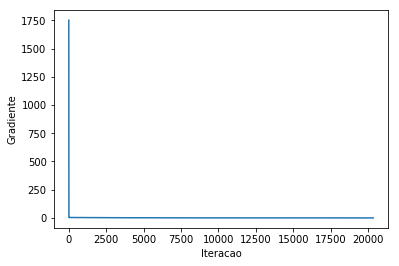

In [13]:
pyplot.plot(PlotData[0],PlotData[1])
pyplot.ylabel("Gradiente")
pyplot.xlabel("Iteracao")
pyplot.show()


O algoritmo possui uma variação do tamanho do gradiente muito acentuada no início e com o passar das iterações a variação se torna mais suave. Dividi o plot em dois para perceber melhor essa variação.

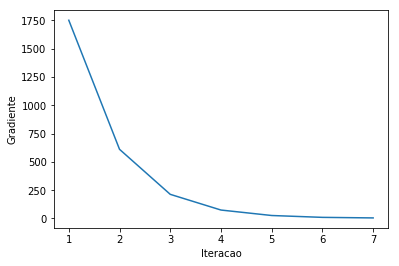

In [14]:
pyplot.plot(PlotData[0][:7],PlotData[1][:7])
pyplot.ylabel("Gradiente")
pyplot.xlabel("Iteracao")
pyplot.show()

Nas primeiras 7 iterações o tamanho do gradiente muda de aproximadamente 1750 na primeira iteração para aproximadamente 4 na sétima.

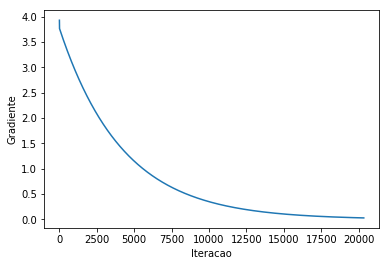

In [15]:
pyplot.plot(PlotData[0][7:],PlotData[1][7:])
pyplot.ylabel("Gradiente")
pyplot.xlabel("Iteracao")
pyplot.show()

As mudanças da 7 iteração em diante se tornam mais suaves em relação ao tamanho do gradiente.

## Passo 7

Função para calcular de forma fechada os coeficientes.

In [16]:
def estimativa_coeficientes(points):
    n = float(len(points))
    mediaX = 0
    mediaY = 0
    for i in range(len(points)):
        mediaX += points[i,0]
        mediaY += points[i, 1]
    mediaX = mediaX / n
    mediaY = mediaY / n

    a = 0
    b = 0
    for i in range(len(points)):
        a += (points[i,0] - mediaX)*(points[i,1]-mediaY)
        b += (points[i, 0] - mediaX) ** 2

    w1 = a/b
    w0 = mediaY - w1*mediaX
    return [w0,w1]

Removendo as linhas de print e plot para comparar o tempo de execução dos dois métodos.

In [17]:
def gradient_descent_runner3(points, initial_b, initial_m, learning_rate, gradient_tolerance):
    current_b = initial_b
    current_m = initial_m
    i=0

    while True:
        i+=1
        
        b_gradient, m_gradient = step_gradient2(current_b, current_m, array(points))
        current_b -= learning_rate * b_gradient
        current_m -= learning_rate * m_gradient
        
        gradientSize = math.sqrt(b_gradient**2 + m_gradient**2)
        if gradientSize <= gradient_tolerance:
            break
            
    return [current_b,current_m]

In [18]:
inicio = time.time()
w0,w1 = estimativa_coeficientes(points)
fim = time.time()
print "Coeficientes pela forma fechada são: w0 = {0} e w1 = {1}.".format(w0, w1)
print "RSS = {0}, tempo de execução = {1}".format(compute_RSS(w0, w1, points), (fim - inicio))

learning_rate = 0.0025
initial_b = 0
initial_m = 0
gradient_tolerance = 0.03

inicio = time.time()
w0, w1 = gradient_descent_runner3(points,initial_b,initial_m,learning_rate, gradient_tolerance)
fim = time.time()
print "\nCoeficientes pelo gradiente descendente são: w0 = {0} e w1 = {1}.".format(w0,w1)
print "RSS = {0}, tempo de execução = {1}".format(compute_RSS(w0, w1, points), (fim - inicio))


Coeficientes pela forma fechada são: w0 = -39.4462566791 e w1 = 5.59948287412.
RSS = 894.86448597, tempo de execução = 0.000246047973633

Coeficientes pelo gradiente descendente são: w0 = -39.1314873326 e w1 = 5.58074529788.
RSS = 895.006332061, tempo de execução = 0.676886081696


Percebe-se que a forma fechada é bem mais eficiente em relação ao tempo de execução e também mais eficaz, comparando os RSS dos dois métodos.